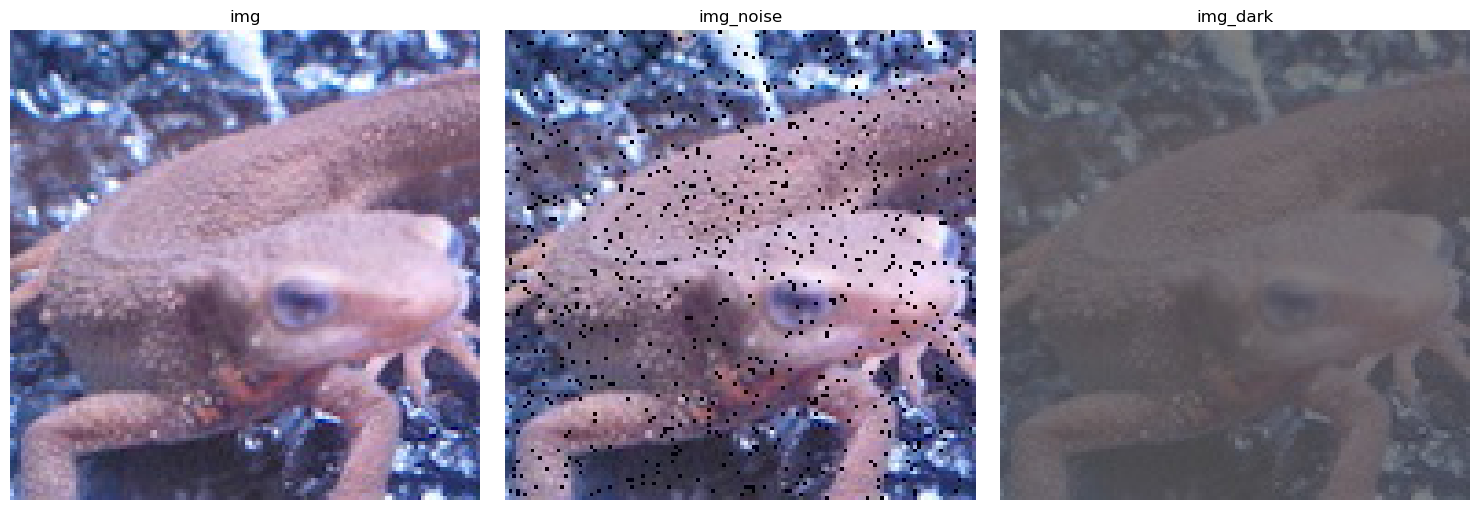

In [16]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#如果没有安装opencv的话，这里可以替换成matplotlib读取图片
img = cv2.imread("imori.jpg")
img_noise = cv2.imread("imori_noise.jpg")
img_dark = cv2.imread("imori_dark.jpg")
#使用matplotlib输出图片，所以要将BGR格式预先转为RBG格式
img = img[:,:,[2,1,0]]
img_noise = img_noise[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_noise)
axes[1].set_title('img_noise')
axes[1].axis('off')

axes[2].imshow(img_dark,)
axes[2].set_title('img_dark')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [17]:
#灰度化
def gray(img):
    newimg = img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0722
    return newimg

In [18]:
# 均值滤波器

# 对图像四周进行0填充,填充宽度为s
def padding(img, s=1):
    #先加行
    rows = np.zeros((s, img.shape[1], img.shape[2]), dtype="uint8")
    #再加列，这时候列长已经扩充 2*s,也就是（128×128） -> (129×129)
    columns = np.zeros((img.shape[0]+(2*s),s,img.shape[2]),dtype="uint8")
    #拼接
    img = np.vstack((rows,img,rows))
    img = np.hstack((columns,img,columns))
    return img

def avgFilter(area):
    #前两个维度推平，并且转置为横向
    area = area.reshape(-1, 3).T
    #进行排序后，按每一行取出中间值
    newk = area.mean(axis = 1)
    return newk


In [19]:
#进行3×3滤波
def getarea(img, padding, method):
    #建立一个新的数组，该数组用于保存计算的高斯滤波值，所以要去掉padding
    #判断是单通道还是多通道(灰度or彩色)
    if len(img.shape) > 2:
        result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding,
                      img.shape[2]],dtype="uint8")
    else:
        result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding],dtype="uint8")
    
    for i in range(int(img.shape[0] - 2)):
        for j in range(int(img.shape[1] - 2)):
            area = img[i:i + 3, j:j + 3]
            #均值滤波器
            if method == "average":
                result[i,j] = avgFilter(area)
            #运动滤波器
            if method=="motion":
                result[i,j] = motFilter(area)
            #max-min滤波器
            if method=="maxmin":
                result[i,j] = maxminFilter(area)
            #差分滤波器(纵向)
            if method=="differential_v":
                result[i,j] = diffFilter(area,True)
            #差分滤波器(横向)
            if method=="differential_h":
                result[i,j] = diffFilter(area,False)
            #Sobel滤波器(纵向)
            if method=="sobel_v":
                result[i,j] = sobelFilter(area,True)
            #Sobel滤波器(横向)
            if method=="sobel_h":
                result[i,j] = sobelFilter(area,False)   
            #Prewitt录波器(纵向)
            if method=="prewitt_v":
                result[i,j] = prewittFilter(area,True)
            #Prewitt录波器(横向)
            if method=="prewitt_h":
                result[i,j] = prewittFilter(area,False) 
            #拉普拉斯滤波器
            if method=="laplacian":
                result[i,j] = laplacianFilter(area)   
            #Emboss滤波器
            if method=="emboss":
                result[i,j] = embossFilter(area) 
            #高斯滤波器
            if(method=="gaussian"):
                result[i,j] = gaussFilter(area)
            #中值滤波器
            if(method=="median"):
                result[i,j] = medianFilter(area)
    return result

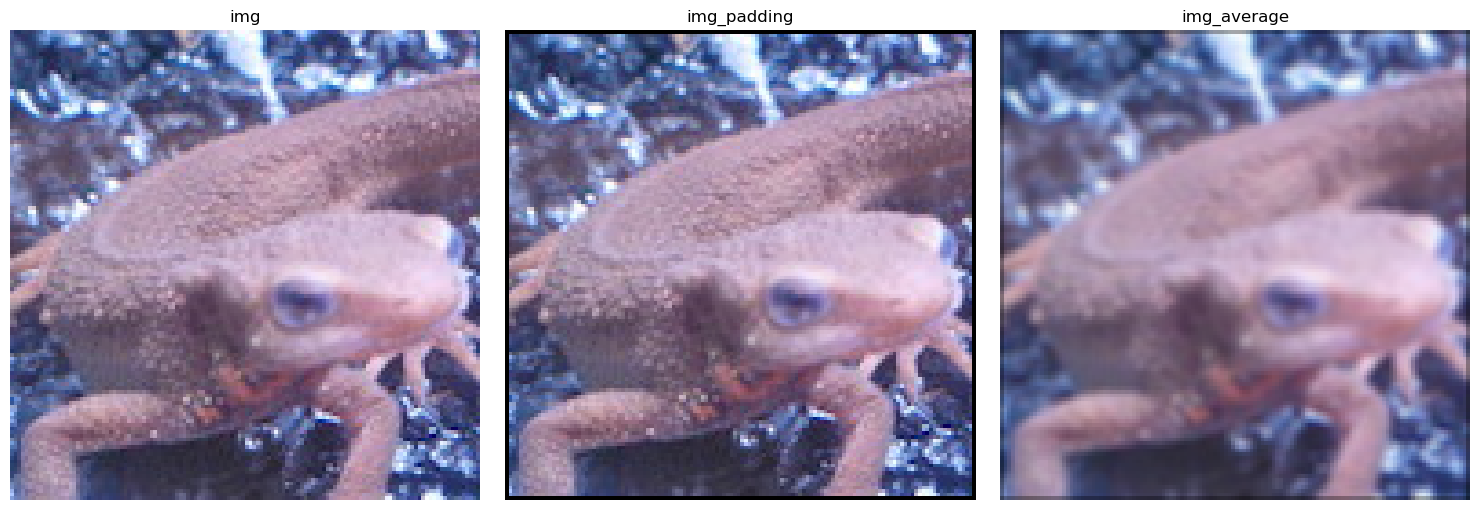

In [20]:
# 均值滤波
img = cv2.imread("imori.jpg")
img_noise = cv2.imread("imori_noise.jpg")
img_dark = cv2.imread("imori_dark.jpg")
#使用matplotlib输出图片，所以要将BGR格式预先转为RBG格式
img = img[:,:,[2,1,0]]
img_noise = img_noise[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img_padding = padding(img, 1)
img_average = getarea(img_padding, 1, "average")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_padding)
axes[1].set_title('img_padding')
axes[1].axis('off')

axes[2].imshow(img_average)
axes[2].set_title('img_average')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

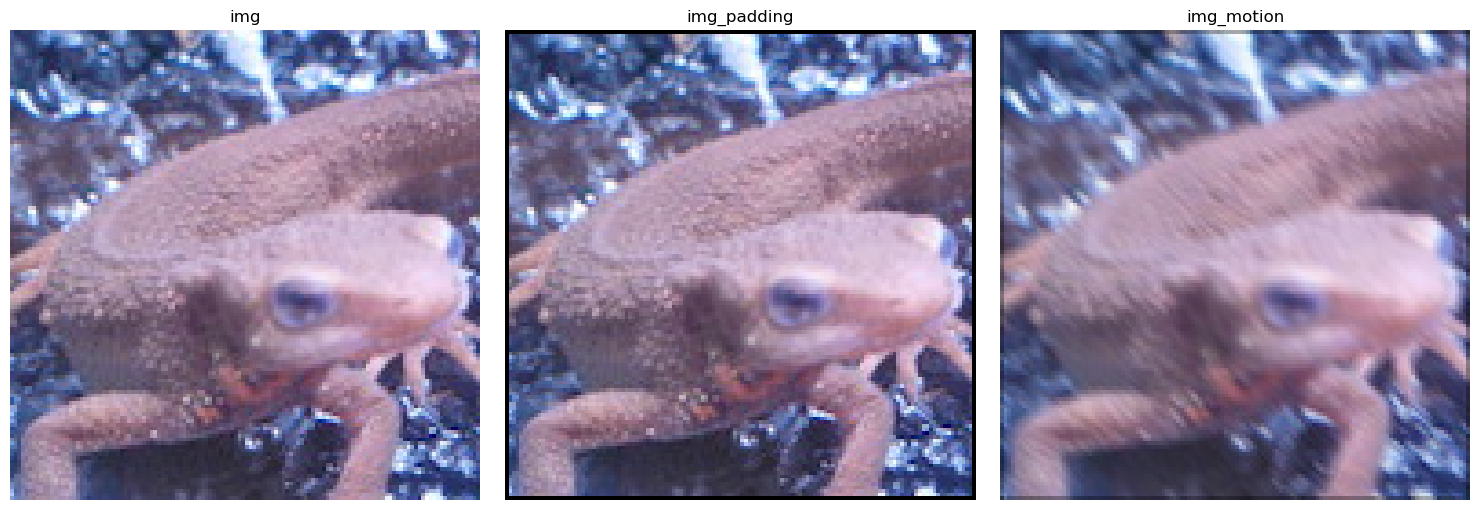

In [21]:
# Motion Filter，Motion Filter取对角线方向的像素的平均值
def motFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #取出对角线的值，计算平均数
    area = area[:,[0,4,8]]
    newk = area.mean(axis=1)
    
    return newk

img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
img_motion = getarea(img_padding, 1, "motion")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_padding)
axes[1].set_title('img_padding')
axes[1].axis('off')

axes[2].imshow(img_motion)
axes[2].set_title('img_motion')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = maxminFilter(area)


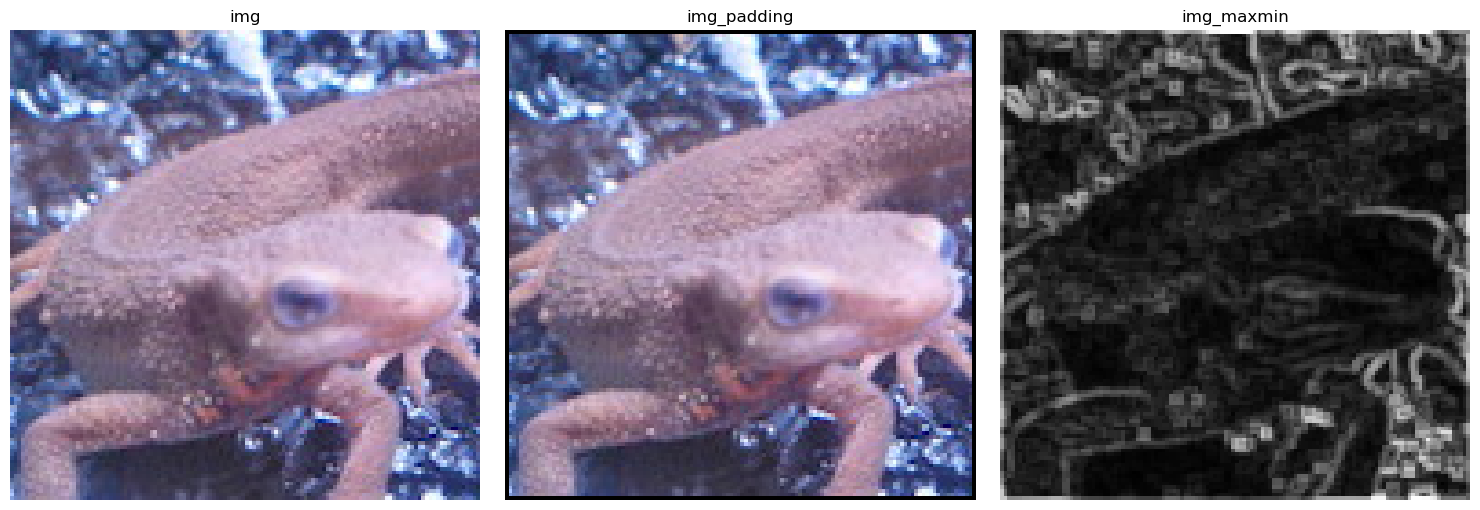

In [36]:
# MAX-MIN滤波器，MAX-MIN滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。通常用于边缘检测。
def maxminFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,1).T
    #取出对角线的值，计算平均数
    newk = area.max(axis=1)-area.min(axis=1)
    return newk

img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
#灰度化
img_gray = gray(img_padding)
img_maxmin = getarea(img_gray, 1, "maxmin")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_padding)
axes[1].set_title('img_padding')
axes[1].axis('off')

axes[2].imshow(img_maxmin, cmap='gray')
axes[2].set_title('img_maxmin')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

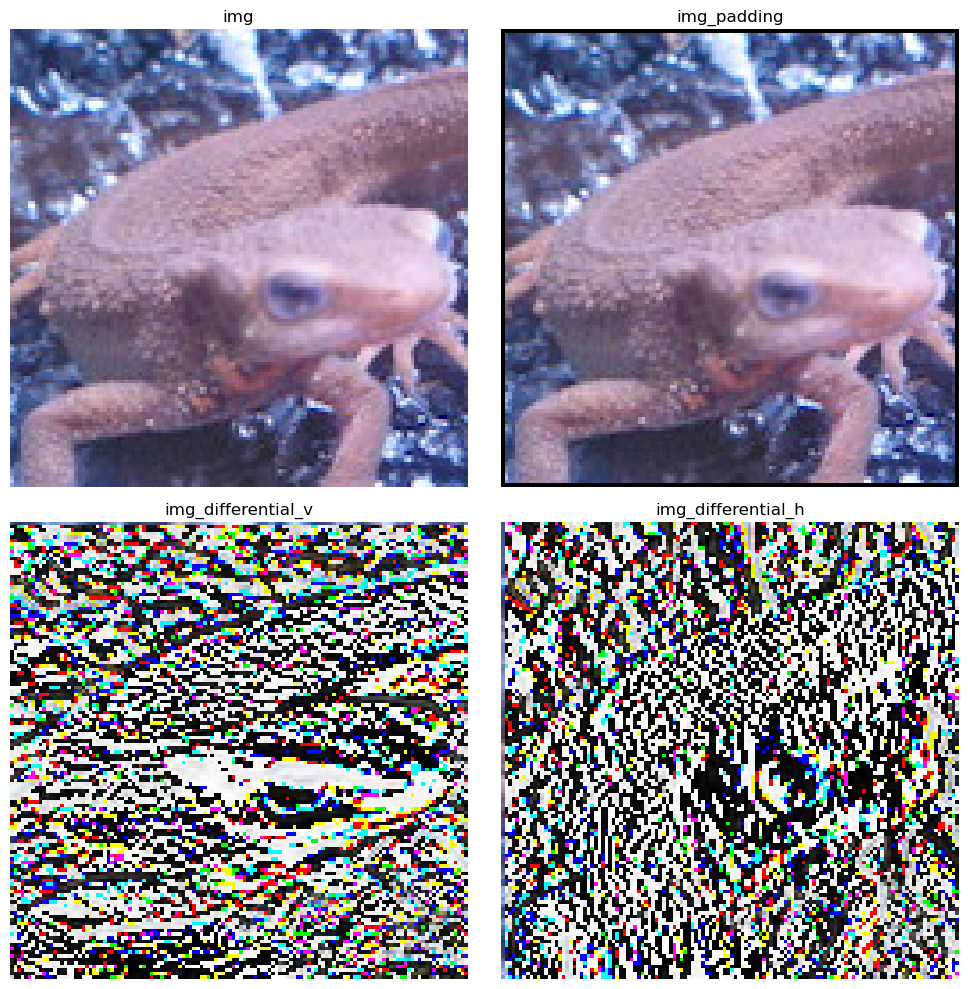

In [35]:
# 差分滤波器  差分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值
def diffFilter(area, isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #取出对角线的值，计算平均数
    x = area[:,4].astype(np.uint8)
    if isDirection:
        y = area[:,1].astype(np.uint8)
    else:
        y = area[:,3].astype(np.uint8)
    newk = np.abs(x-y).astype(np.uint8)
    return newk

img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
img_differential_v = getarea(img_padding, 1, "differential_v")
img_differential_h = getarea(img_padding, 1, "differential_h")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# 显示每个图像
axes[0, 0].imshow(img)
axes[0, 0].set_title('img')
axes[0, 0].axis('off')  # 隐藏坐标轴

axes[0, 1].imshow(img_padding)
axes[0, 1].set_title('img_padding')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_differential_v)
axes[1, 0].set_title('img_differential_v')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_differential_h)
axes[1, 1].set_title('img_differential_h')
axes[1, 1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = sobelFilter(area,True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = sobelFilter(area,False)


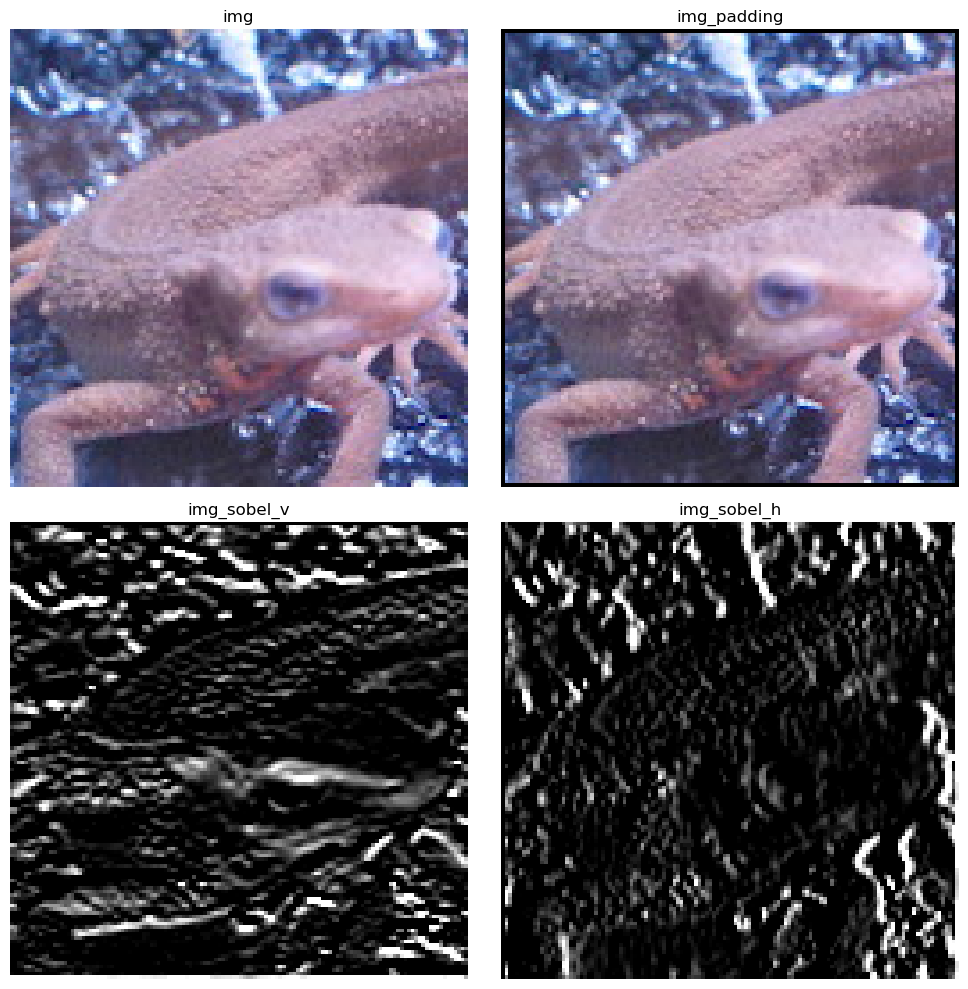

In [41]:
# Sobel滤波器,Sobel滤波器可以提取特定方向（纵向或横向）的边缘

def sobelFilter(area,isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    if isDirection:
        c = np.array([1,2,1,0,0,0,-1,-2,-1]).reshape(-1,1)
    else:
        c = np.array([1,0,-1,2,0,-2,1,0,-1]).reshape(-1,1)
    #计算滤波
    newk = np.dot(area,c)
     #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk


img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
#灰度化
img_gray = gray(img_padding)
img_sobel_v = getarea(img_gray, 1, "sobel_v")
img_sobel_h = getarea(img_gray, 1, "sobel_h")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# 显示每个图像
axes[0, 0].imshow(img)
axes[0, 0].set_title('img')
axes[0, 0].axis('off')  # 隐藏坐标轴

axes[0, 1].imshow(img_padding)
axes[0, 1].set_title('img_padding')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_sobel_v, cmap='gray')
axes[1, 0].set_title('img_sobel_v')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_sobel_h, cmap='gray')
axes[1, 1].set_title('img_sobel_h')
axes[1, 1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = prewittFilter(area,True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = prewittFilter(area,False)


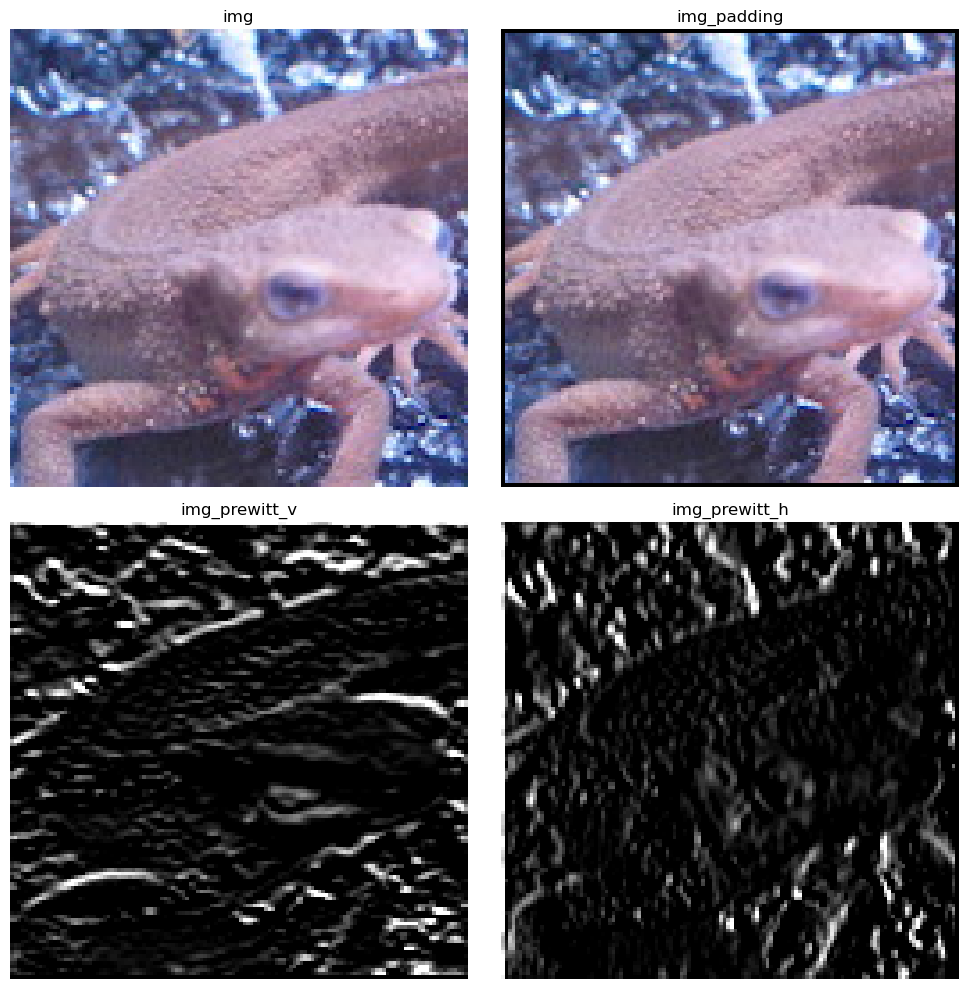

In [42]:
# Prewitt滤波器，Prewitt滤波器是用于边缘检测的一种滤波器

def prewittFilter(area,isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    if isDirection:
        c = np.array([-1,-1,-1,0,0,0,1,1,1]).reshape(-1,1)
    else:
        c = np.array([-1,0,1,-1,0,1,-1,0,1]).reshape(-1,1)
    #计算滤波
    newk = np.dot(area,c)
     #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk


img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
#灰度化
img_gray = gray(img_padding)
img_prewitt_v = getarea(img_gray, 1, "prewitt_v")
img_prewitt_h = getarea(img_gray, 1, "prewitt_h")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# 显示每个图像
axes[0, 0].imshow(img)
axes[0, 0].set_title('img')
axes[0, 0].axis('off')  # 隐藏坐标轴

axes[0, 1].imshow(img_padding)
axes[0, 1].set_title('img_padding')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_prewitt_v, cmap='gray')
axes[1, 0].set_title('img_prewitt_v')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_prewitt_h, cmap='gray')
axes[1, 1].set_title('img_prewitt_h')
axes[1, 1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = laplacianFilter(area)


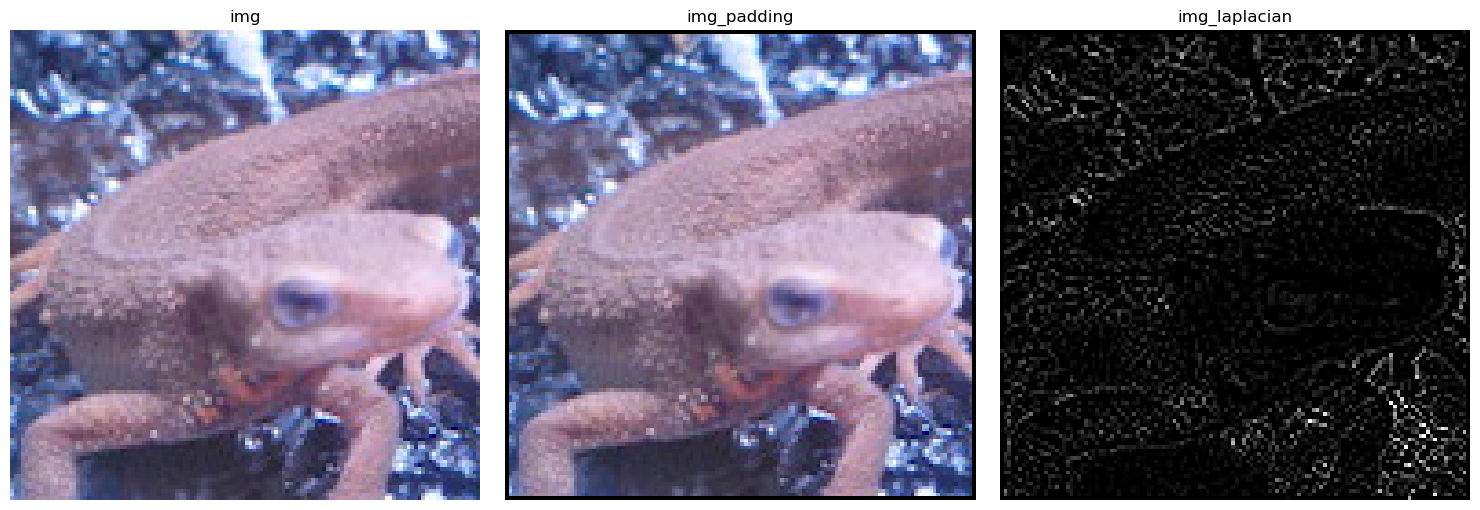

In [43]:
# Laplacian滤波器，Laplacian滤波器是对图像亮度进行二次微分从而检测边缘的滤波器
def laplacianFilter(area):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    
    c = np.array([0,1,0,1,-4,1,0,1,0]).reshape(-1,1)

    #计算滤波
    newk = np.dot(area,c)
    #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk

img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
#灰度化
img_gray = gray(img_padding)
img_laplacian = getarea(img_gray, 1, "laplacian")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_padding)
axes[1].set_title('img_padding')
axes[1].axis('off')

axes[2].imshow(img_laplacian, cmap='gray')
axes[2].set_title('img_laplacian')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = embossFilter(area)


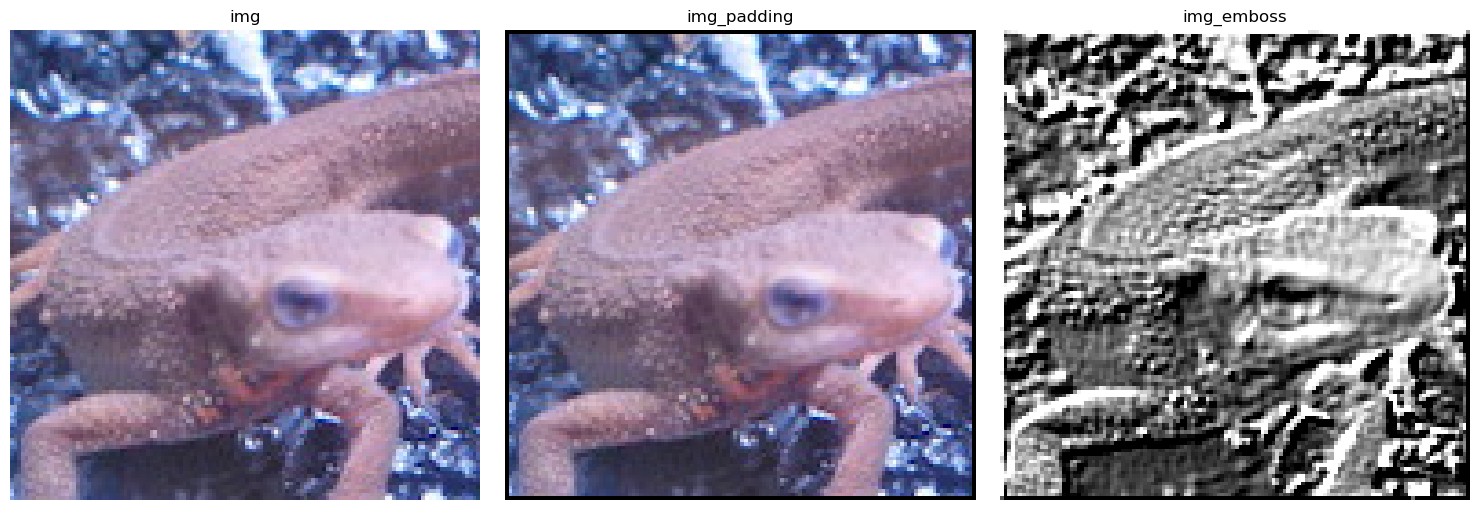

In [44]:
# Emboss滤波器，Emboss滤波器可以使物体轮廓更加清晰

def embossFilter(area):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    
    c = np.array([-2,-1,0,-1,1,1,0,1,2]).reshape(-1,1)

    #计算滤波
    newk = np.dot(area,c)
    #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk


img = cv2.imread("imori.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
#灰度化
img_gray = gray(img_padding)
img_emboss = getarea(img_gray, 1, "emboss")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_padding)
axes[1].set_title('img_padding')
axes[1].axis('off')

axes[2].imshow(img_emboss, cmap='gray')
axes[2].set_title('img_emboss')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14068\1633854720.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i,j] = laplacianFilter(area)


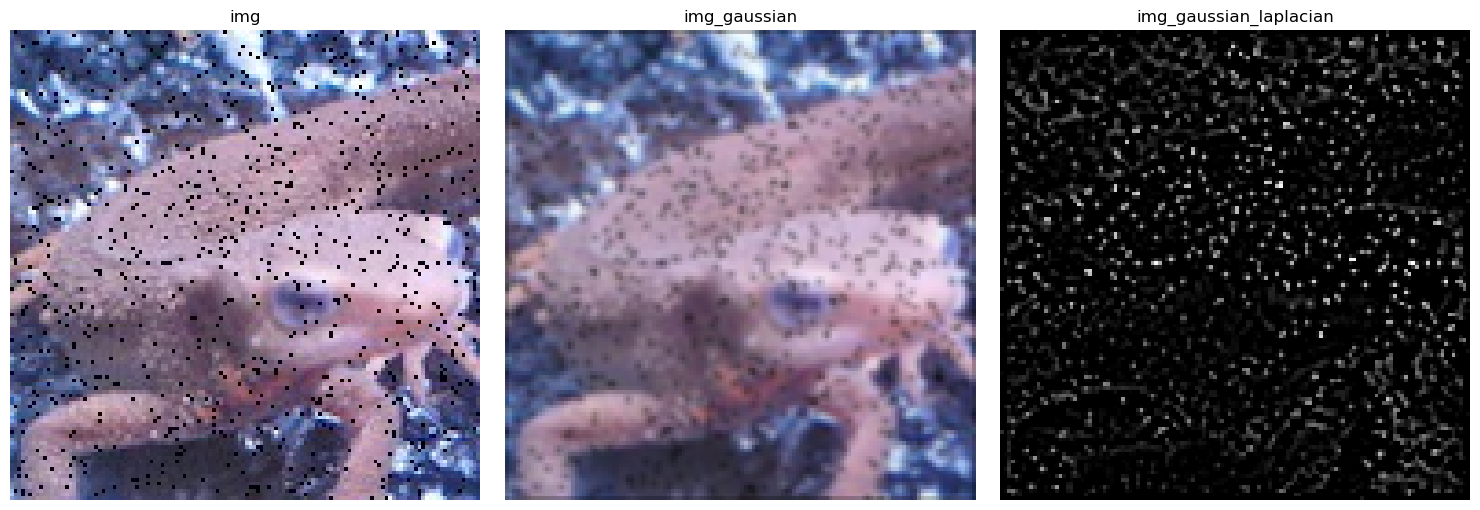

In [46]:
# LoG滤波器，LoG即高斯-拉普拉斯（Laplacian of Gaussian）的缩写，使用高斯滤波器使图像平滑化之后再使用拉普拉斯滤波器使图像的轮廓更加清晰

def gaussFilter(area):
    #拉成一条，用矩阵的乘法完成滤波计算，参考卷积核计算方法
    area = area.reshape(-1,3)
    
    kernel = np.array([1,2,1,2,4,2,1,2,1])*(1/16)
    
    newk = np.dot(kernel,area)
    newk = newk.astype(np.uint8)
    return newk


def medianFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #进行排序后取出中间值
    newk = np.sort(area,axis=1)[:,4]
    return newk

img = cv2.imread("imori_noise.jpg")
img = img[:,:,[2,1,0]]
img_padding = padding(img, 1)
img_gaussian = getarea(img_padding, 1, "gaussian")
img_gaussian_pad = padding(img_gaussian, 1)
img_gaussian_pad = gray(img_gaussian_pad)
img_gaussian_laplacian = getarea(img_gaussian_pad, 1, "laplacian")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img_gaussian)
axes[1].set_title('img_gaussian')
axes[1].axis('off')

axes[2].imshow(img_gaussian_laplacian, cmap='gray')
axes[2].set_title('img_gaussian_laplacian')
axes[2].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

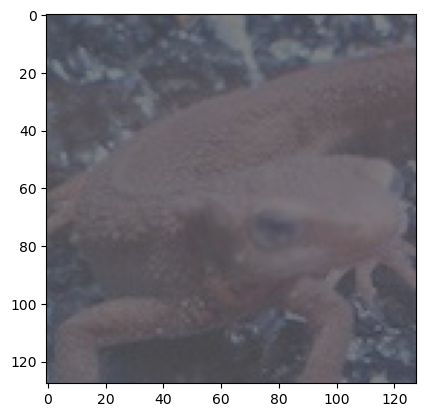

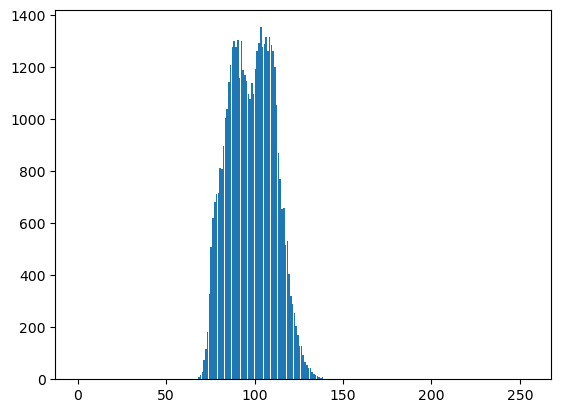

In [49]:
# 直方图

imgshow = plt.imshow(img_dark)
plt.show()

img10 = img_dark.copy()
#img10 = img10.astype(np.float)
img10 = img10.reshape(-1)
hist = plt.hist(img10, bins=255, rwidth=0.85, range=(0,255))
plt.show()